# A Simplified Agent-Based Model of Routine Activities Theory

By: Mark Speers
___

# Routine Activities Theory
___

## What is Routine Activities Theory (RAT)
Routine activities theory is a theory of crime opportunity. It attempts to explain the occurrence of crime using the routinized daily movement patterns of individuals.

This theory has three essential components. 
1. Motivated offenders
2. Suitable victims
3. Capable Guardians

**Basic Idea:** The central premise behind this theory is that offenses (specifically robbery in the context of the current project) occur when motivated offenders converge with suitable victims without the presence of capable guardians. 

## A note on simplication
This model will be an EXTREMELY simplified version of routine activities theory. It will be so simplistic that it will not accurately represent the theory. A realistic agent-based model of the theory would require multiple moving agents, each with their own routine paths of travel and characteristics. In the following model, in order to increase feasibility the agents serving as victims and capable guardians have been frozen.

The plan is to continually build on this model over the course of my Ph.D.. Agent behavior and the environment will become more complex and realistic as I expand my programming and computational modeling skills. This is only the beginning!

# Model Description
___

## Environment and Model-Level Characteristics

- 1 cell = 47 x 47 feet$^1$
- Grid sizes are
    - 100x100$^1$ 
    - 200x200$^2$
- Approximately 5-10% of citizens are offenders (reflecting ≈9.25% found by previous research)$^2$
    - citizen population is created first then the offender population as a percentage of the citizens
- Approximately 2-3 capable guardians per 1000 citizens$^2$

## Types of Agents 

1. Offenders 
2. Suitable Victims 
3. Capable Guardians

## Agent Characteristics

### Agent Characteristics I

#### Offenders 
- move throughout the environment in a randomized cardinal direction. 
    - offenders move between 6 and 8 cells during each tick to account for different walking speeds$^1$
- if an offender encounters a suitable victim agent without a capable guardian within 7 cells, the offender commits a robbery

### Agent Characteristics II
#### Citizens
- frozen in environment 
- if visited by offender without a capable guardian around, they are victimized

### Agent Characteristics III
#### Capable Guardians 
- frozen in environment
- if within 7 cells (329 feet) of a citizen, that citizen will not be victimized$^3$



# Necessary Packages
___

In [2]:
# import commands 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import time
from IPython.display import display, clear_output

# Functions for model
___

## Create City Function

In [3]:
# define size of city, number of citizens in it, number of offenders within number of citizens, 
#and number of capable guardians

def make_city_v2(rows, columns, number_citizens, number_offenders, number_guardians):
    # create city_array of designated size full of zeros
    city = np.zeros((rows, columns))
    
    # define percentage of city that is filled with citizens
    citizen_percent = number_citizens/city.size
    
    # define percentage of citizens that are offenders
    offender_percent = number_offenders/number_citizens
    
    # define percentage of citizens that are capable guardians
    guardian_percent = number_guardians/number_citizens
    
# CITIZEN ASSIGNMENT LOOP 

    # loop through each row
    for i in range(city.shape[0]):
    
        # loop through each column
        for j in range(city.shape[1]):
            
            # assign current index to random value b/w 0 and 1
            city[i,j] = np.random.uniform(0,1)
            
            # if the assigned value is <= % of city that is filled with citizens, assign 1 (citizen)
            if city[i,j] <= citizen_percent:
                city[i,j] = 1 
            
            # else assign 0 (empty space)
            else:
                city[i,j] = 0 
    
# OFFENDER ASSIGNMENT LOOP 
    
    # loop through each row
    for i in range(city.shape[0]):
        
        # loop through each column
        for j in range(city.shape[1]):
            
            # if the value at index [i,j] is 1: (if there is a citizen in the cell)
            if city[i,j] == 1:
            
                # set index[i,j] = np.random.uniform(0,1) (randomizing cell value)
                city[i,j] = np.random.uniform(0,1)
            
                # if index[i,j] <= percentage of citizens that are offenders: 
                if city[i,j] <= offender_percent:
            
                    # index[i,j] = 2 (assigning the value cell as an offender)
                    city[i,j] = 2
            
                # else:
                    # index[i,j] = 1 (leaving as citizen)
                else:
                    city[i,j] = 1
            
            # else:
                # pass - we leave the 0 as a 0 
            else:
                pass
                    
# CAPABLE GUARDIAN ASSIGNMENT LOOP
    
    # loop through each row 
    for i in range(city.shape[0]):
        
        # loop through each column 
        for j in range(city.shape[1]):
            
            # if the value at index [i,j] is 1: (if there is a citizen in the cell)
            if city[i,j] == 1:
                
                # use np.random.uniform(0,1) to assign a new cell value
                city[i,j] = np.random.uniform(0,1)
                
                # if the new cell value is <= the percentage of capable guardians 
                if city[i,j] <= guardian_percent:
                    # assign a cell value of 3 (capable guardian) 
                    city[i,j] = 3
                    
                # else:
                    # assign a cell value of 1 (citizen) 
                else:
                    city[i,j] = 1
                    
            # if the original cell value is not 1, then leave as is
                # pass
            else:
                pass
            
    # return city
    return city

## Function to plot city

In [4]:
def cityplot(cityarray):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    ax.set_title('City Plot')
    plt.imshow(cityarray, cmap = 'Accent')

### Testing Make_city_v2 and cityplot functions

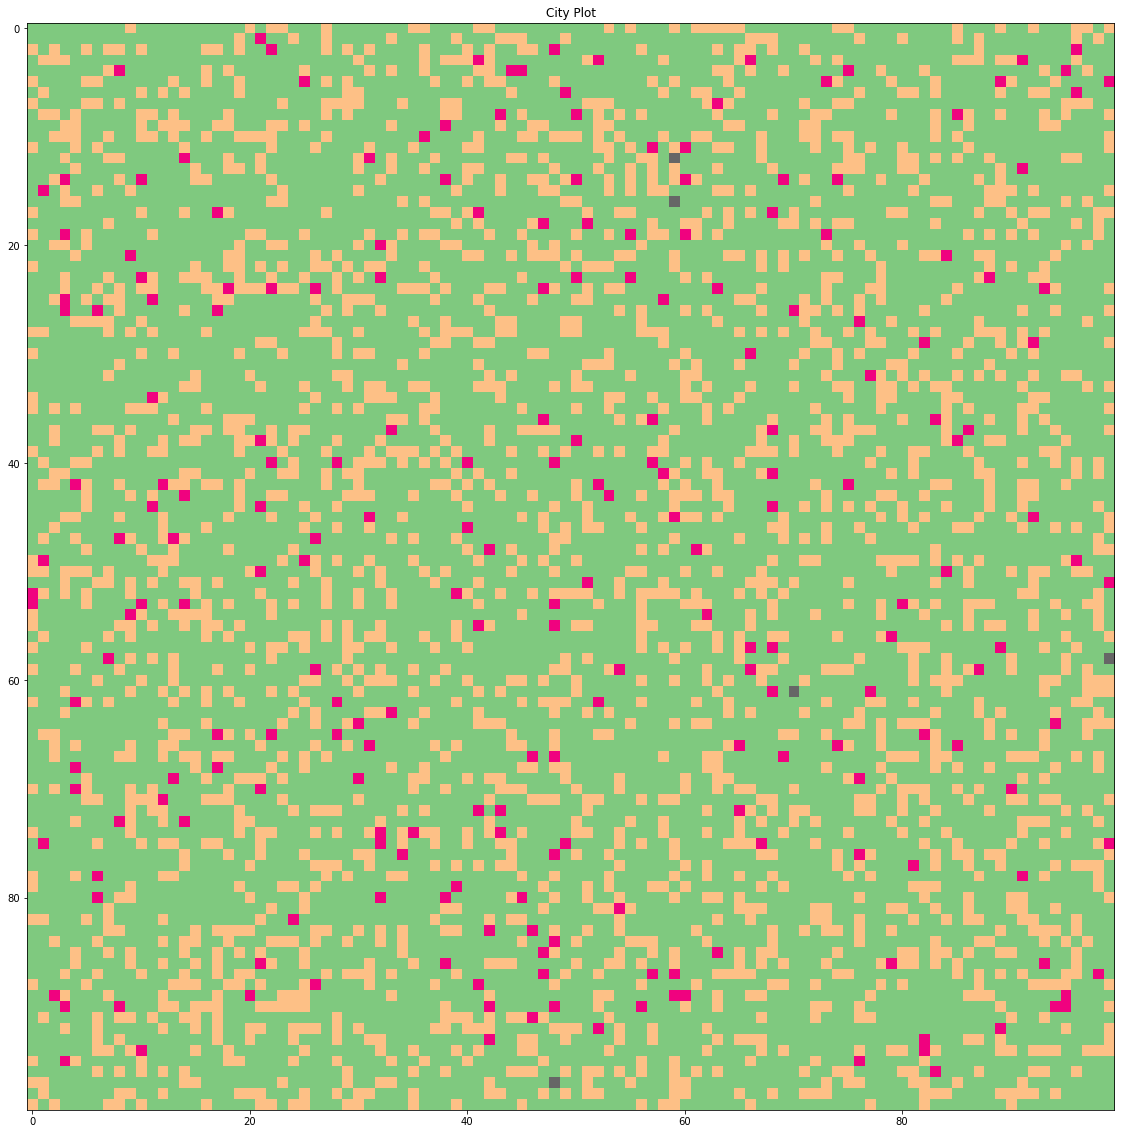

In [17]:
example_city = make_city_v2(100,100,2500,225,5)
cityplot(example_city)

## Function to make heatmap plot of robbery_record
This function plots an array at the end of the advance_city_v2 function. This array will be the same shape as the input city and each cell will have 1 added to it for every robbery that occurs on the corresponding city cell. In effect the cells will get more red the more robberies occur on that cell. 

In [6]:
## FUNCTION TO PLOT ROBBERY RECORD ARRAY
def heatmapplot(robbery_record_array):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    ax.set_title("Robbery Heat Map")
    plt.imshow(robbery_record_array, cmap = "Reds")

## Descriptives Function

In [7]:
def descriptives(city):
    print('There are {0} citizens in the model.',
          "There are {1} offenders in the model."
          "There are {2} capable guardians in the model".format(len(city[city == 1]), 
                                                                len(city[city == 2]), 
                                                                len(city[city == 3])))

## Function to check if offender's new position is on board

In [8]:
def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

## Function to check neighbor values to see if capable guardian is within deterrent distance

In [9]:
def getNeighborValues(i,j, board):
    #neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighborhood_array = board[i-7:i+8, j-7:j+8]
    
    #neighbor_values = []
    #for neighbor in neighborhood_array:
        #if onBoard(neighbor[0], neighbor[1], board):
            #neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighborhood_array#neighbor_values

## New get neighbors function (credit to [stackoverflow answer writer](https://stackoverflow.com/questions/56983818/getting-a-subset-of-2d-array-given-indices-of-center-point))
I tried to write a function that did this but this version was much more elegant so I ended up using it.

In [10]:
def fixed_size_subset(a, x, y, size):
    '''
    Gets a subset of 2D array given a x and y coordinates
    and an output size. If the slices exceed the bounds 
    of the input array, the non overlapping values
    are filled with NaNs
    ----
    a: np.array
        2D array from which to take a subset
    x, y: int. Coordinates of the center of the subset
    size: int. Size of the output array
    ----       
    Returns:
        np.array
        Subset of the input array
    '''
    o, r = np.divmod(size, 2)
    l = (x-(o+r-1)).clip(0)
    u = (y-(o+r-1)).clip(0)
    a_ = a[l: x+o+1, u:y+o+1]
    out = np.full((size, size), np.nan, dtype=a.dtype)
    out[:a_.shape[0], :a_.shape[1]] = a_
    return out

## Advance City Function

### Essential Steps in Advancing Board Function

1. Function takes in the city

2. Function defines new city

3. Function updates new city with positions of offenders after having moved 6-8 cells in a specific direction
    - loops through cells in city
    - if offender moves to cell where victim is, the nearby cells are checked for capable guardians
        - if there are no guardians within 7 cells of the victim, a robbery occurs and is recorded on the robbery_record array


4. after updating all offender positions, a copy of the previous city is created

5. lastly, returns new city and previous city

### Defining advance_city function

In [22]:
def advance_city_v2(city, previous_city):
    
    # defining new city
    new_city = city.copy()
    
    # defining city_copy to use as neighbor check and later as previous_city
    city_copy = city.copy()

    for i in range(city.shape[0]):
        for j in range(city.shape[1]):

            # if cell in city is empty space:
                # it stays empty in new_city
            if city[i,j] == 0:
                new_city[i,j] = 0

            # if cell in city is a citizen 
                # it stays a citizen in new_city and doesn't move (booooo)
            elif city[i,j] == 1:
                new_city[i,j] = 1

            # if cell in city is capable guardian
                # it stays a guardian in new_city and doesn't move (boooo)
            elif city[i,j] == 3:
                new_city[i,j] = 3

            # if cell in city is the location of a new offender, then do not alter it
            elif city[i,j] == 4:
                continue

                # if cell in city is offender 
            elif city[i,j] == 2:

                ##-- FINDING NEW POINT FOR OFFENDER TO MOVE TO --##

                found_point = False
                while found_point == False:

                    # select distance (6-8 cells) to be travelled 
                    distance = np.random.randint(6,9) 

                    # select direction to travel (north = 1, east = 2, south = 3, west = 4)
                    direction = np.random.randint(1,5)

                    # identify new_point based on distance and direction
                    if direction == 1: # if new direction is north 
                        #new_point = city[i-distance,j]
                        new_point_i = i - distance
                        new_point_j = j
                        if onBoard(new_point_i, new_point_j, city) == True and city[new_point_i, new_point_j] != 2 and city[new_point_i, new_point_j] != 4 and city[new_point_i, new_point_j] !=3:
                            found_point = True
                            #print(new_point_i, new_point_j)
                            new_city[new_point_i, new_point_j] = 2
                            city[new_point_i, new_point_j] = 4

                    elif direction == 2: # if new direction is east
                        #new_point = city[i,j+distance]
                        new_point_i = i
                        new_point_j = j + distance
                        if onBoard(new_point_i, new_point_j, city) == True and city[new_point_i, new_point_j] != 2 and city[new_point_i, new_point_j] != 4 and city[new_point_i, new_point_j] !=3:
                            found_point = True
                            #print(new_point_i, new_point_j)
                            new_city[new_point_i, new_point_j] = 2
                            city[new_point_i, new_point_j] = 4

                    elif direction == 3: # if direction is south 
                        #new_point = city[i+distance,j]
                        new_point_i = i + distance
                        new_point_j = j
                        if onBoard(new_point_i, new_point_j, city) == True and city[new_point_i, new_point_j] != 2 and city[new_point_i, new_point_j] != 4 and city[new_point_i, new_point_j] !=3:
                            found_point = True
                            #print(new_point_i, new_point_j)
                            new_city[new_point_i, new_point_j] = 2
                            city[new_point_i, new_point_j] = 4

                    elif direction == 4: # if direction is west 
                        #new_point = city[i,j-distance]
                        new_point_i = i
                        new_point_j = j - distance
                        if onBoard(new_point_i, new_point_j, city) == True and city[new_point_i, new_point_j] != 2 and city[new_point_i, new_point_j] != 4 and city[new_point_i, new_point_j] !=3:
                            found_point = True
                            #print(new_point_i, new_point_j)
                            new_city[new_point_i, new_point_j] = 2
                            city[new_point_i, new_point_j] = 4

                ##-- FILLING IN OFFENDER'S OLD LOCATION WITH PREVIOUS_CITY VALUE --## 

                ###-- checking value of offender's old location in previous_city --###

                # if value of offender's old location in previous_city was empty
                    # set the cell's value in new_city to empty
                if previous_city[i,j] == 0:
                    new_city[i,j] = 0

                # if value of offender's old location in previous_city was citizen
                    # set the cell's value in new_city to a citizen
                if previous_city[i,j] == 1:
                    new_city[i,j] = 1

                # if value of offender's old location in previous_city was capable guardian
                    # set the cell's value in new_city to a capable guardian
                    #  I DON'T THINK THIS IS NECESSARY ANYMORE BECAUSE OFFENDERS AREN'T ABLE TO MOVE ONTO A SPACE THAT ==3
                if previous_city[i,j] == 3:
                    new_city[i,j] = 3

                # if value of offender's location in previous_city was offender
                    # set the value in new_city to empty 
                if previous_city[i,j] == 2:
                    new_city[i,j] = 0


                ##-- CHECKING IF OFFENDER IS ON SAME CELL AS CITIZEN --##

                # if offender's new location had a citizen on it in city:
                    # check neighbor values of that offender's new_point index in city 
                if city_copy[new_point_i, new_point_j] == 1:

                    ##-- CHECKING THE NEIGHBORS FOR A CAPABLE GUARDIAN --##

                    # if there is a capable guardian in the neighborhood values of city[new_point]:
                    if 3 in fixed_size_subset(city_copy, new_point_i, new_point_j, 15):

                        # no robbery is recorded 

                        # set the cell's value in new_city = to offender (2)
                        new_city[new_point_i, new_point_j] = 2

                    # if there is NOT a capable guardian in the neighborhood values:
                    elif 3 not in fixed_size_subset(city_copy, new_point_i, new_point_j, 15):

                        # set the cell at robbery_record[i,j] += 1 
                        robbery_record[new_point_i, new_point_j] += 1

                        # set the cell's value in new_city = to offender (2) 
                        new_city[new_point_i, new_point_j] = 2

                # if offender's new location did not have a citizen on it:
                    # no robbery is recorded, continue looping through the array
                else:
                    continue

    previous_city = city_copy.copy()
    
    return new_city, previous_city

### Testing advance_city_v2 function

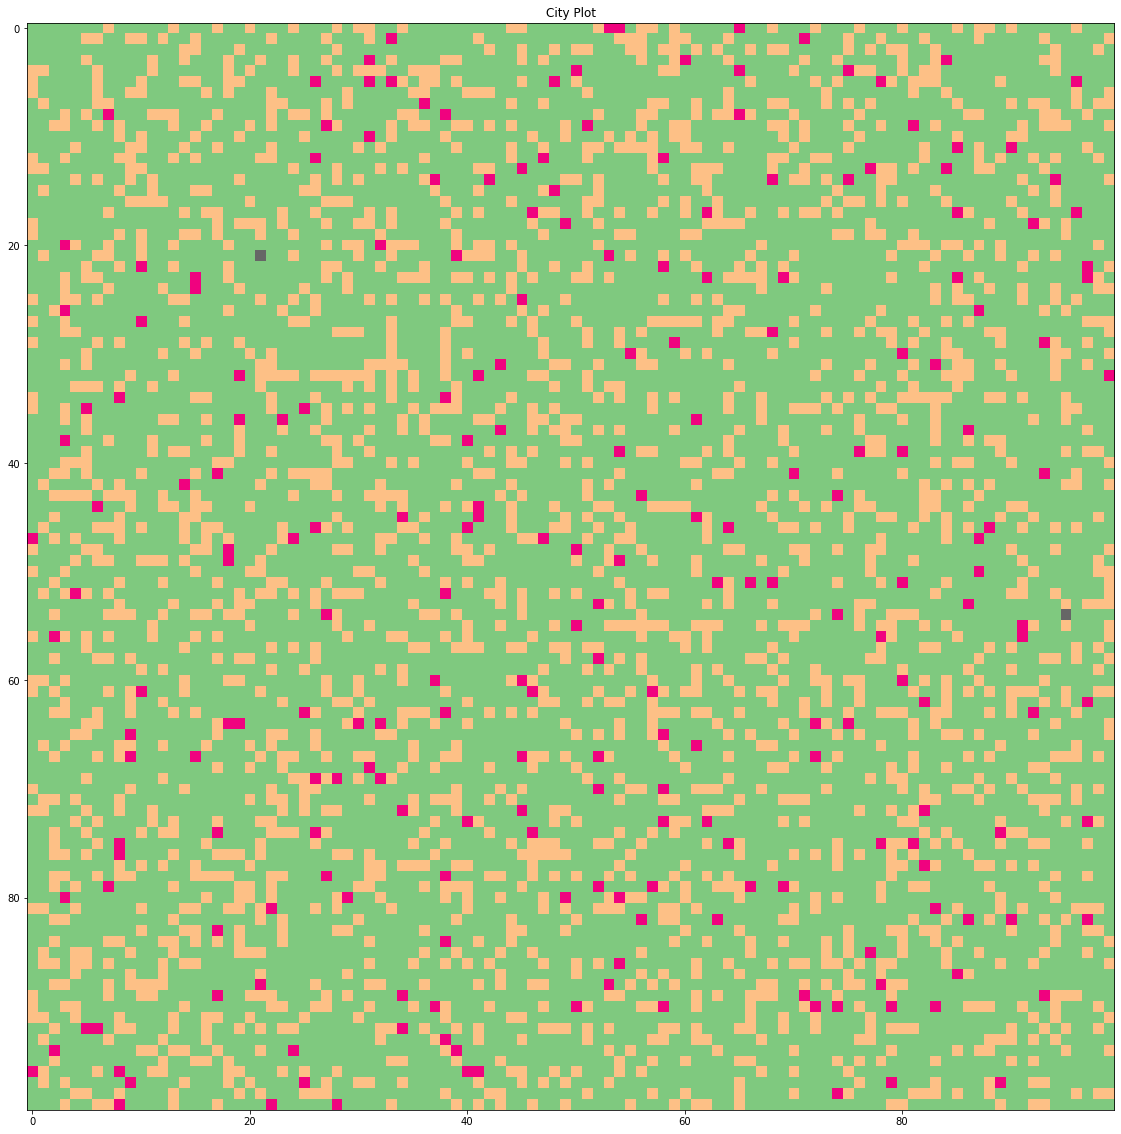

In [23]:
# creating example_city to test advance_city function on
example_city = make_city_v2(100,100,2500,225,5)
cityplot(example_city)

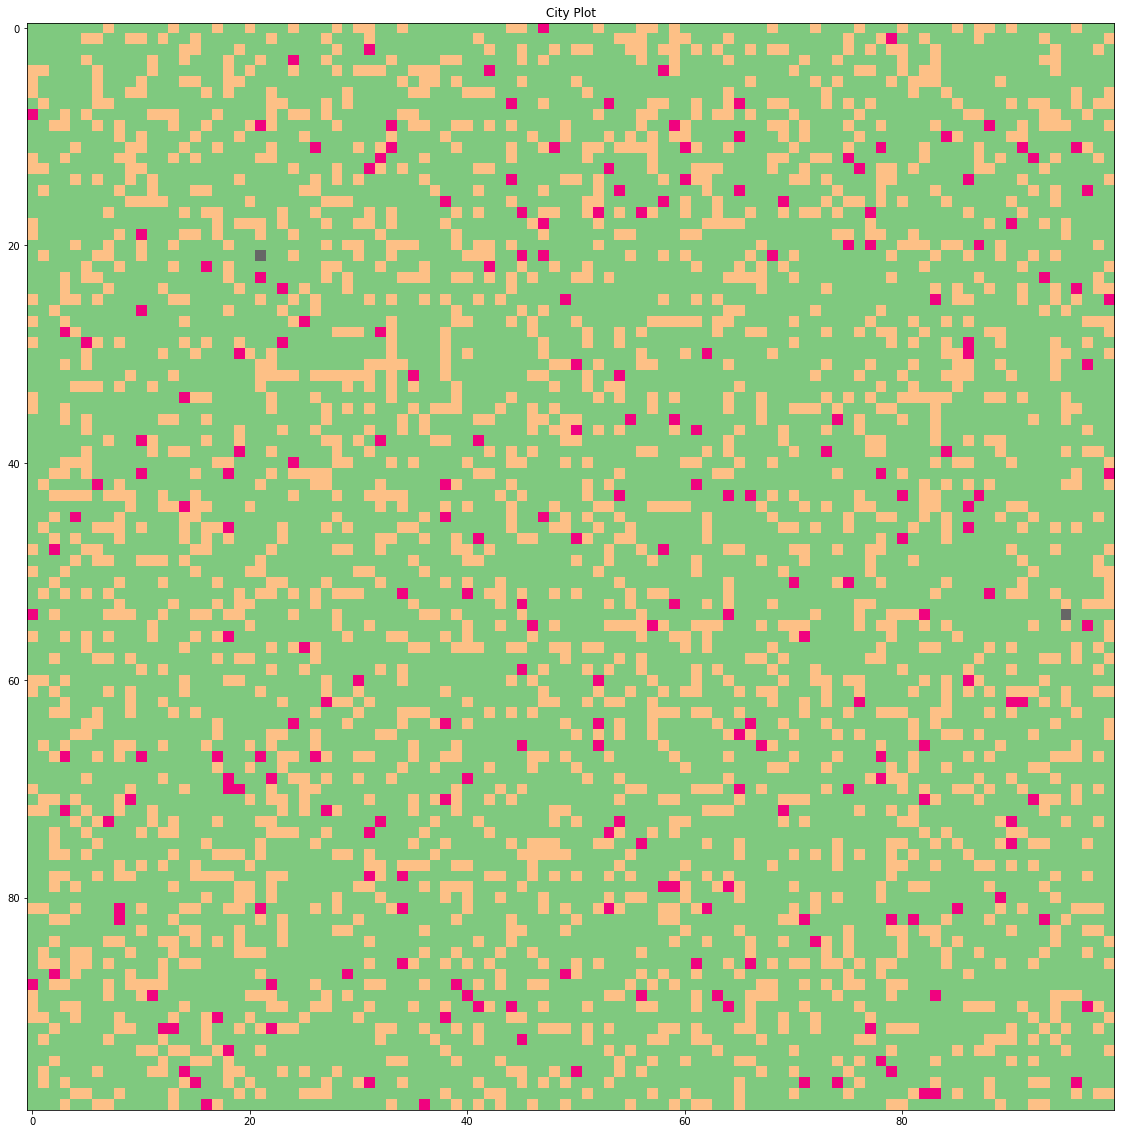

In [24]:
previous_city = example_city.copy()
robbery_record = np.zeros_like(example_city)
example_city_v2, previous_city = advance_city_v2(example_city, previous_city)
cityplot(example_city_v2)

# Attempts to Animate
My animations are basic. I just plot the city and then clear the plot and plot the new city that is returned by the advance_city_v2 function. At the end of the loop the robbery record array is plotted. 

## Large Cities

### Model 1- 20,000 PEOPLE, 1800 OFFENDERS, 30 CAPABLE GUARDIANS

<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

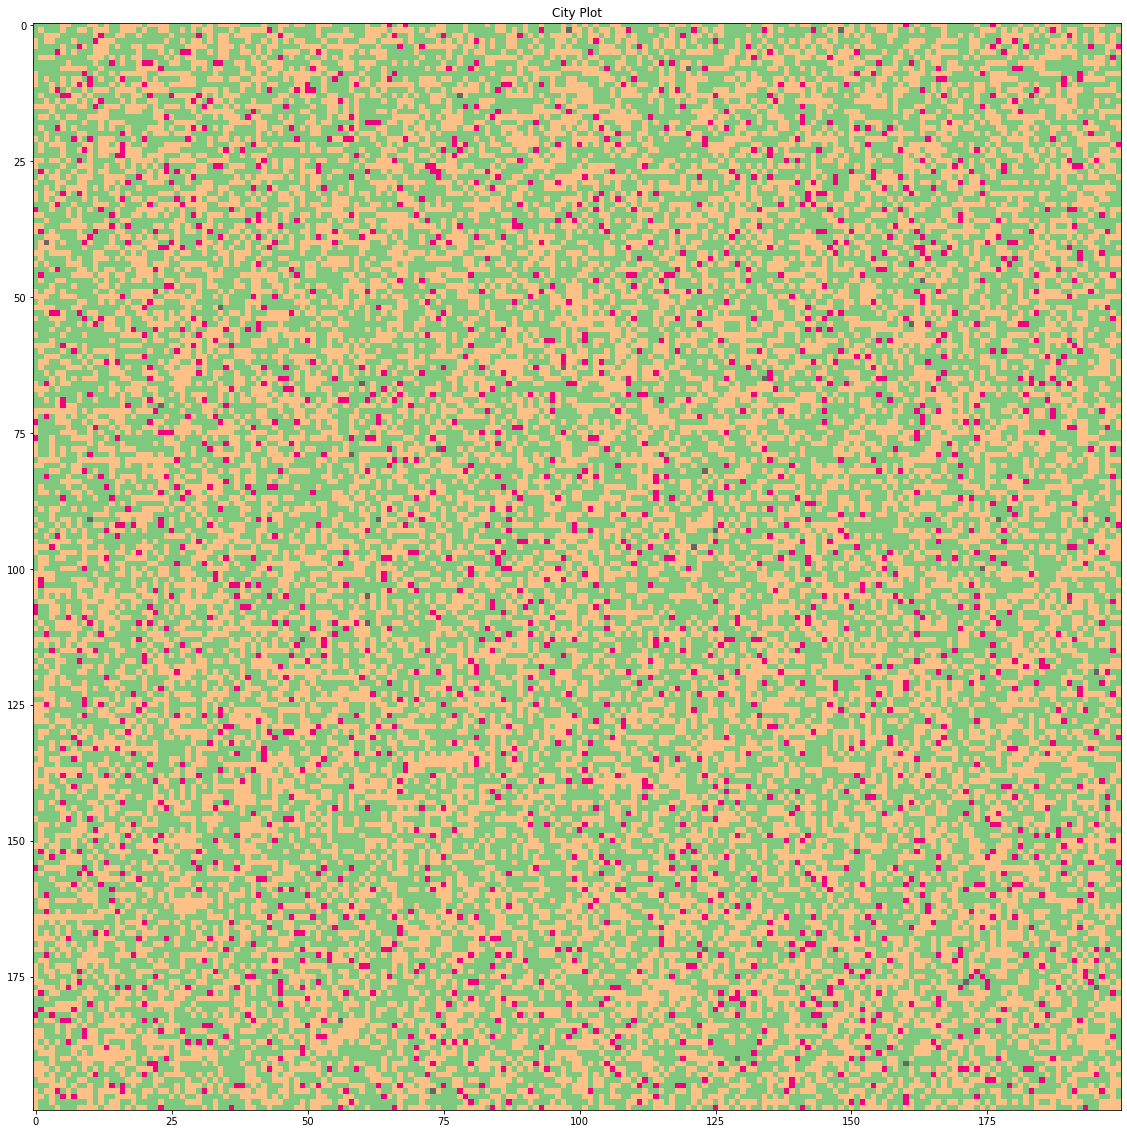

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [26]:
# MODEL 1 - 20,000 PEOPLE, 1800 OFFENDERS, 30 CAPABLE GUARDIANS

# creating city, initial previous_city and robbery_record
city = make_city_v2(200, 200, 20000, 1800, 30)
previous_city = city.copy()
robbery_record = np.zeros_like(city)

fig = plt.figure(figsize=(20,20))

#plotting the original city
cityplot(city)

for i in range(100):
    
    city, previous_city = advance_city_v2(city, previous_city)
    
    cityplot(city)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    plt.show()
    plt.clf()
    
    
plt.close()

heatmapplot(robbery_record)

robbery_record.sum()
# sum amount of robberies == 70728

### Model 2 - 20,000 PEOPLE, 1800 OFFENDERS, 60 CAPABLE GUARDIANS

In [ ]:
#%% MODEL 2 - 20,000 PEOPLE, 1800 OFFENDERS, 60 CAPABLE GUARDIANS

city = make_city_v2(200, 200, 20000, 1800, 60)
previous_city = city.copy()
robbery_record = np.zeros_like(city)

fig = plt.figure(figsize=(20,20))

#plotting the original city
cityplot(city)

for i in range(100):
    
    city, previous_city = advance_city_v2(city, previous_city)
    
    cityplot(city)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    plt.show()
    plt.clf()
    
    
plt.close()

heatmapplot(robbery_record)

robbery_record.sum()
# sum amount of robberies == 60198

## Small cities

### Model 3 - 2500 people, 225 offenders, 5 guardians

In [ ]:
#%% MODEL 3 - (BIRKS ET AL., 2014) - SMALLER CITY 

city = make_city_v2(100, 100, 2500, 225, 5)
previous_city = city.copy()
robbery_record = np.zeros_like(city)

fig = plt.figure(figsize=(20,20))

#plotting the original city
cityplot(city)

for i in range(100):
    
    city, previous_city = advance_city_v2(city, previous_city)
    
    cityplot(city)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    plt.show()
    plt.clf()
    
    
plt.close()

heatmapplot(robbery_record)

robbery_record.sum()
# sum amount of robberies == 4315

### Model 4 - 2500 people, 225 offenders, 15 guardians

In [ ]:
#%% MODEL 4 - (BIRKS ET AL., 2014) - SMALLER CITY - HIGH GUARDIAN PRESENCE
city = make_city_v2(100, 100, 2500, 225, 15)
previous_city = city.copy()
robbery_record = np.zeros_like(city)

fig = plt.figure(figsize=(20,20))

#plotting the original city
cityplot(city)

for i in range(100):
    
    city, previous_city = advance_city_v2(city, previous_city)
    
    cityplot(city)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    plt.show()
    plt.clf()
    
    
plt.close()

heatmapplot(robbery_record)


robbery_record.sum()
# sum amount of robberies == 4680

# Elements to be integrated in the future.

## Agent movement enhancements
- Offender movement
    - routinize the movement of offenders to 4-5 activity spaces
    - alter offender movement from teleport to cell traversal
    - stagger offender movement starting point
- Citizen/Victim movement
    - victims would have 4-5 activity nodes they move to 
    - return home after being robbed
    - concentrate citizens at activity nodes in environment
- Capable guardian
    - walk a routine beat similar to a police officer

## Environment enhancements
- utilize a GIS layer to create a realistic spatial environment
- create a risk map that influences offender behavior

## General enhancements
- create classes for each agent type to facilitate inclusion of 
    - Offenders
        - propensity score (some offenders more likely to offend)
            - vary propensity score based on recency of offense
    - Victims
        - capable guardian score
        - suitability score (as a victim)
    - Capable guardians
        - vary the deterrent effect with time (day vs. night)

# References


$^1$ Weisburd, D., Braga, A. A., Groff, E. R., & Wooditch, A. (2017). Can Hot Spots Policing Reduce Crime in Urban Areas? An Agent-Based Simulation*. Criminology, 55(1), 137–173. https://doi.org/10.1111/1745-9125.12131

$^2$ Birks, D., Townsley, M., & Stewart, A. (2014). Emergent Regularities of Interpersonal Victimization: An Agent-Based Investigation. Journal of Research in Crime and Delinquency, 51(1), 119–140. https://doi.org/10.1177/0022427813487353

$^3$Wooditch, Alese, and David Weisburd. 2016. Using space–time analysis to evaluate criminal justice programs: An application to stop-question-frisk practices. *Journal of Quantitative Criminology* 32:191–213.